In [38]:
#https://wtrust.com.br/
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import cointegration_mult as mult
import Cointegration as coint

importlib.reload(coint)
importlib.reload(mult)

<module 'cointegration_mult' from 'D:\\trades\\pairs_trading_b3\\cointegration_mult.py'>

In [39]:
def plot_pairs(pairs, data):
    for i, row in pairs.iterrows():
        y_symbol = row['Dependent']
        x_symbol = row['Independent']
        period = row['Period']
        mult.plot_residue3(data, y_symbol, x_symbol, period)

In [40]:
path_data_cart = 'datasets/data_cart.csv'
path_data_yahoo = 'datasets/data_yahoo.csv'
path_data = 'datasets/data.csv'

In [41]:
data = pd.read_csv(path_data_yahoo, index_col=0)
data = data[::-1]
pairs = pd.read_csv('datasets/cointegrated_pairs_mult.csv')

print('{} to {}'.format(data.index[-1], data.index[0]))
print('data: {}'.format(data.shape))
print('pairs: {}'.format(pairs.shape))

2019-05-02 to 2020-07-31
data: (312, 72)
pairs: (2027, 13)


In [42]:
#data.to_excel('datasets/data_cart.xlsx')

In [43]:
pairs

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,Std,HalfLife,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,120,ABEV3,AZUL4,-4.835227,99,0.136064,1.396495,2,0.668561,0.695332,Long/Short,2,"100,120"
1,120,ABEV3,B3SA3,-3.698654,99,0.206269,1.218659,3,0.627810,0.606785,Long/Short,2,"100,120"
2,250,ABEV3,BBAS3,-3.025017,95,0.234412,1.154282,10,0.594128,0.575986,Short/Long,7,"100,120,140,160,180,240,250"
3,220,ABEV3,BBDC3,-2.866829,90,0.415934,0.350312,9,0.620278,0.174758,Short/Long,7,"100,120,140,160,180,200,220"
4,240,ABEV3,BBDC4,-2.987771,95,0.386011,0.585503,9,0.605416,0.292141,Short/Long,8,"100,120,140,160,180,200,220,240"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,250,VALE3,VVAR3,-3.076967,95,1.225950,0.529226,7,0.525859,0.264083,Short/Long,6,"100,120,140,220,240,250"
2023,100,VALE3,WEGE3,-4.519020,99,-0.039200,0.559656,2,0.400342,0.278425,Long/Short,1,100
2024,200,VIVT4,VVAR3,-2.944980,95,0.609770,0.761807,7,0.446286,0.379950,Short/Long,6,"100,120,140,160,180,200"
2025,220,VIVT4,WEGE3,-2.952915,95,0.355833,0.445079,8,0.317892,0.222033,Long/Short,7,"100,120,140,160,180,200,220"


In [54]:
#(pairs['Signal'] >= 1) \
#& (pairs['Signal'] <= 1.2) \

pairs_signal = pairs.loc[
    (pairs['Std'] >= 1) \
    & (pairs['Std'] <= 1.5) \
    & (pairs['PeriodQt'] >= 9) \
    & (pairs['ADF'] >= 99) \
    & (pairs['HalfLife'] <= 6) \
].sort_values(by=['HalfLife'], ascending=True).copy()
pairs_signal.reset_index(drop=True, inplace=True)
pairs_signal

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,Std,HalfLife,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,CPFE3,ENGI11,-5.203205,99,0.551982,1.015206,3,0.718127,0.506587,Long/Short,9,"100,120,140,160,180,200,220,240,250"
1,250,CCRO3,IRBR3,-4.976900,99,0.216053,1.171111,3,0.397665,0.584383,Short/Long,9,"100,120,140,160,180,200,220,240,250"
2,250,ENBR3,TAEE11,-5.501307,99,1.187180,1.061475,3,0.689865,0.529675,Short/Long,9,"100,120,140,160,180,200,220,240,250"
3,250,BBSE3,ITSA4,-4.721279,99,2.304963,1.429645,4,0.719310,0.713391,Long/Short,9,"100,120,140,160,180,200,220,240,250"
4,250,BRML3,FLRY3,-4.832629,99,0.752558,1.431496,4,0.695405,0.714315,Long/Short,9,"100,120,140,160,180,200,220,240,250"
5,250,BRML3,EMBR3,-4.762667,99,0.965399,1.258464,4,0.642879,0.627972,Long/Short,9,"100,120,140,160,180,200,220,240,250"
6,250,EGIE3,TIMP3,-4.957198,99,2.322598,1.435758,4,0.576273,0.716442,Short/Long,9,"100,120,140,160,180,200,220,240,250"
7,250,ENBR3,LREN3,-5.076069,99,0.279101,1.498575,4,0.658729,0.747788,Short/Long,9,"100,120,140,160,180,200,220,240,250"
8,250,CIEL3,ITUB4,-4.990877,99,0.249333,1.079696,4,0.569765,0.538767,Short/Long,9,"100,120,140,160,180,200,220,240,250"
9,250,BBSE3,IRBR3,-4.588873,99,0.359586,1.029452,4,0.314412,0.513696,Short/Long,9,"100,120,140,160,180,200,220,240,250"


Plot o gráficos dos resíduos de 'pairs_signal'

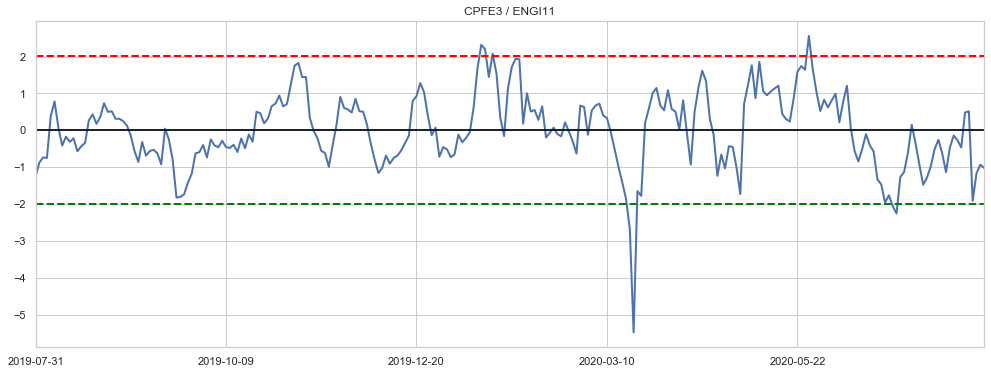

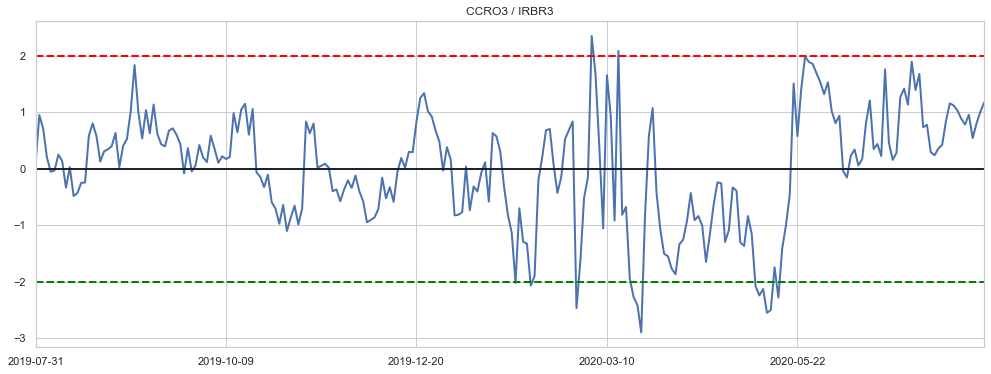

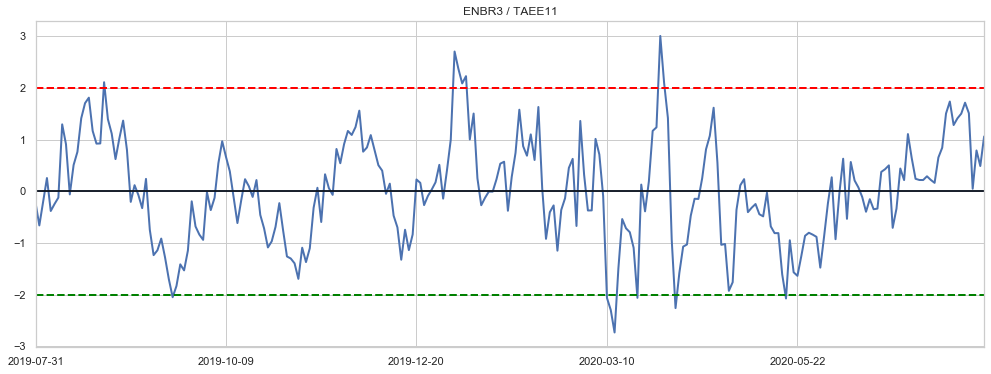

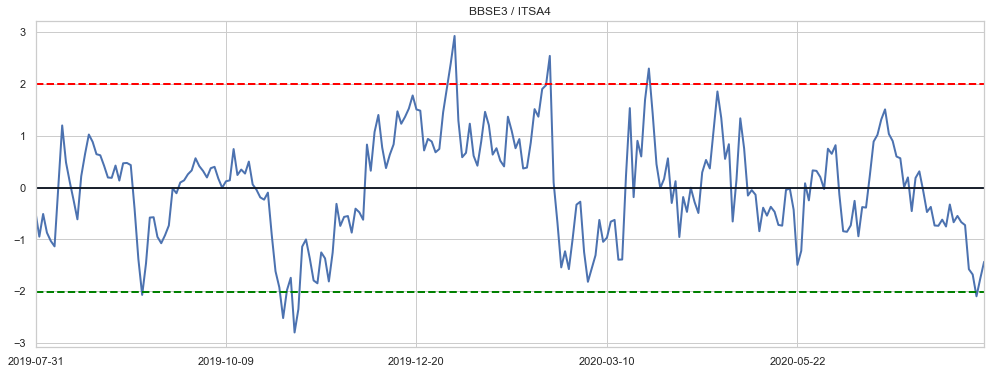

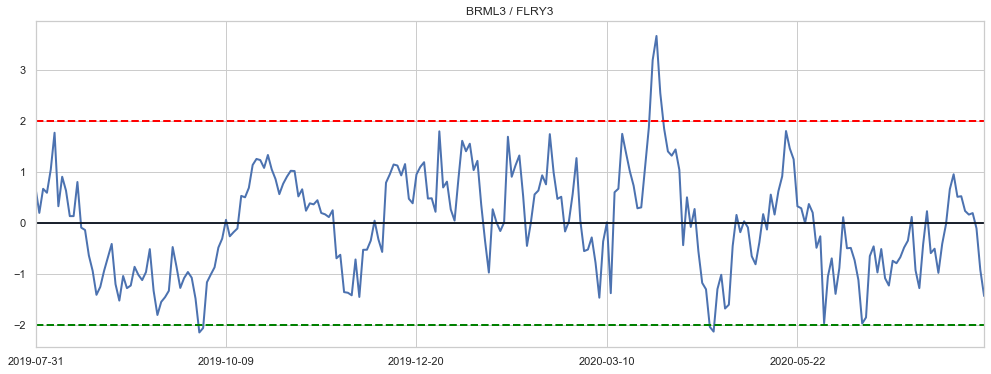

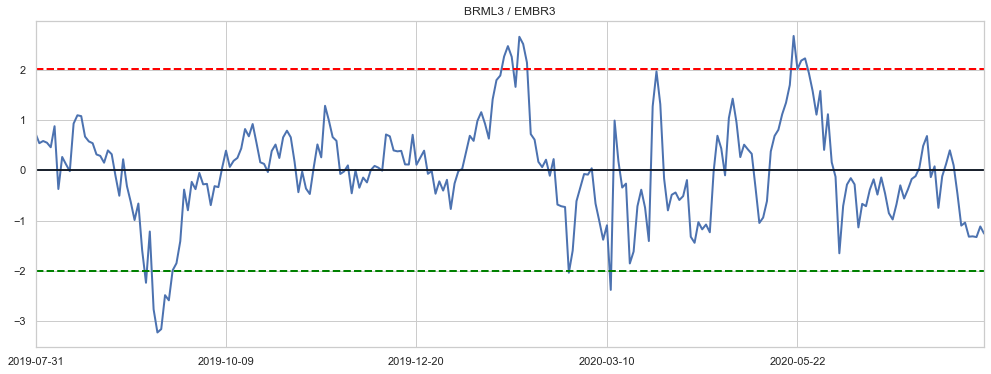

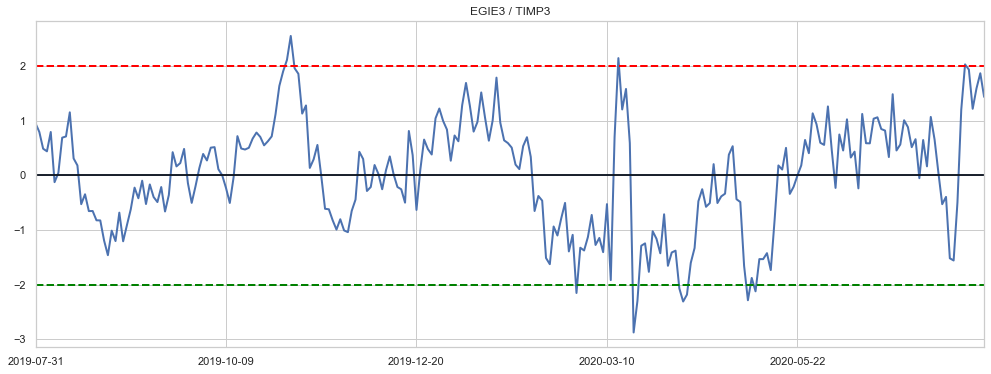

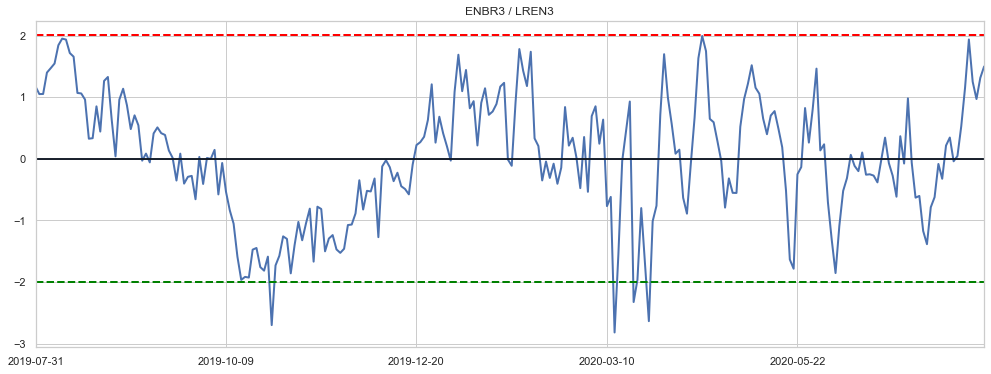

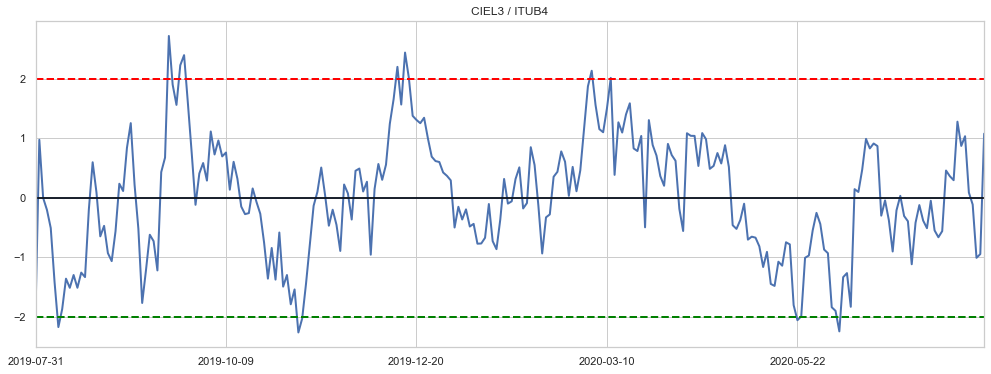

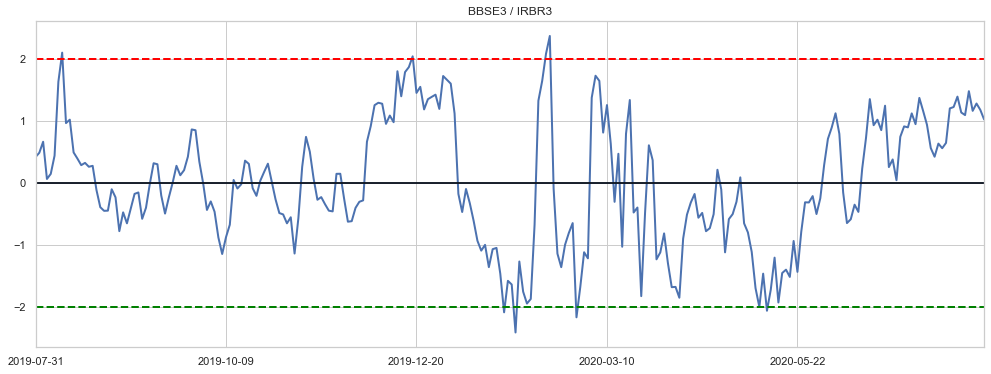

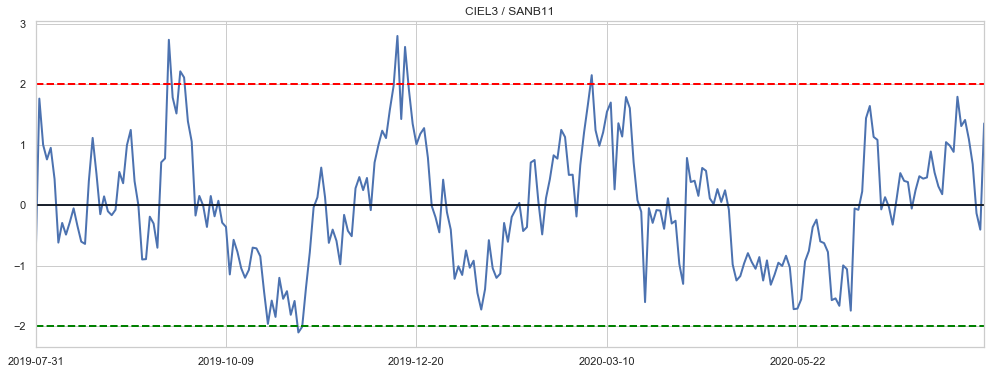

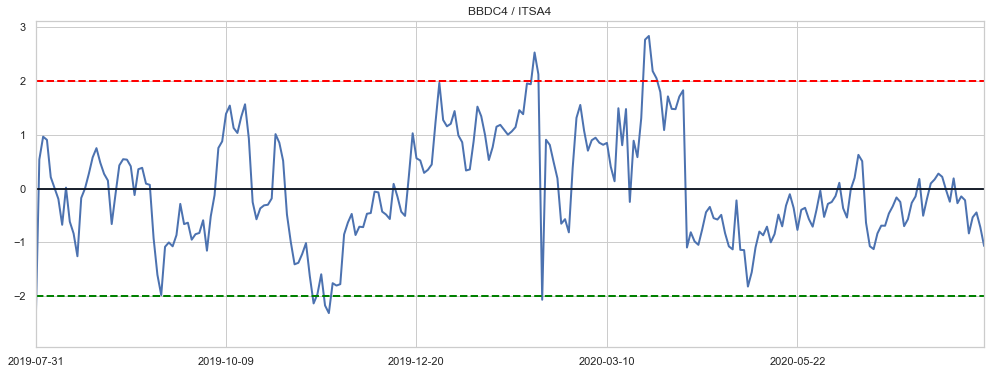

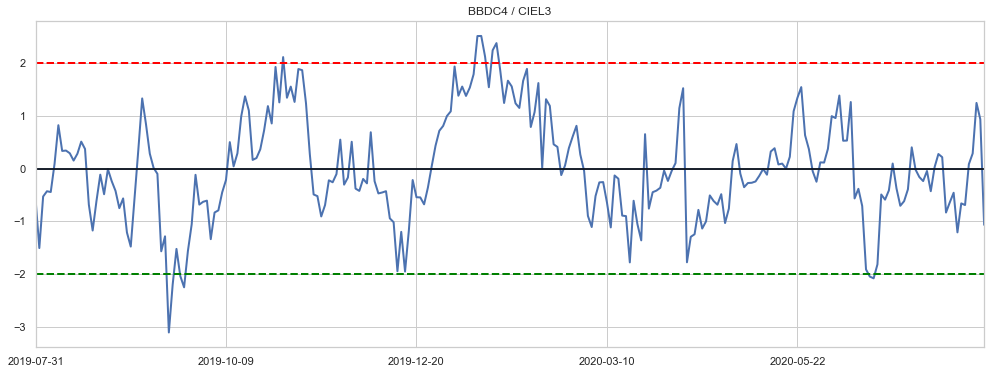

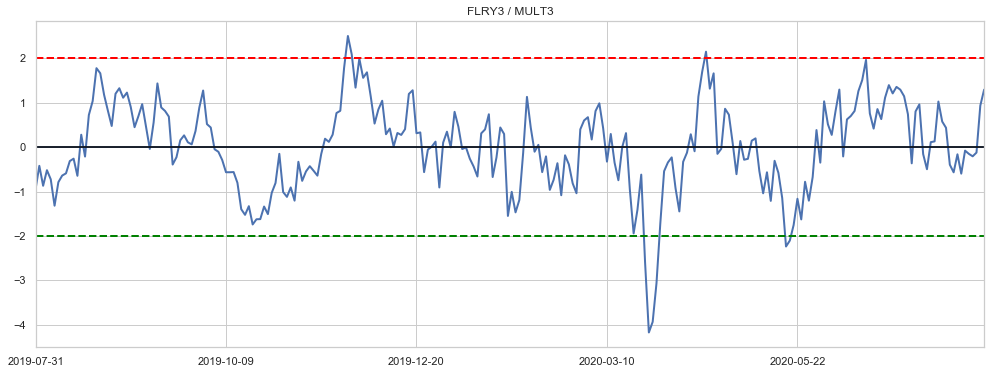

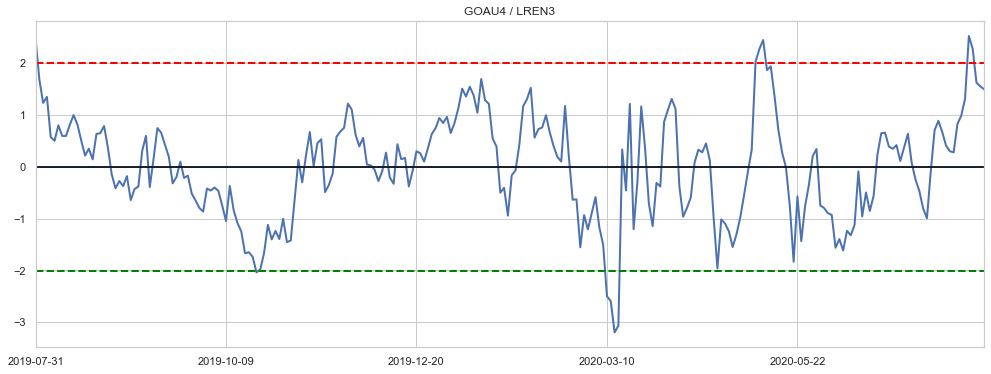

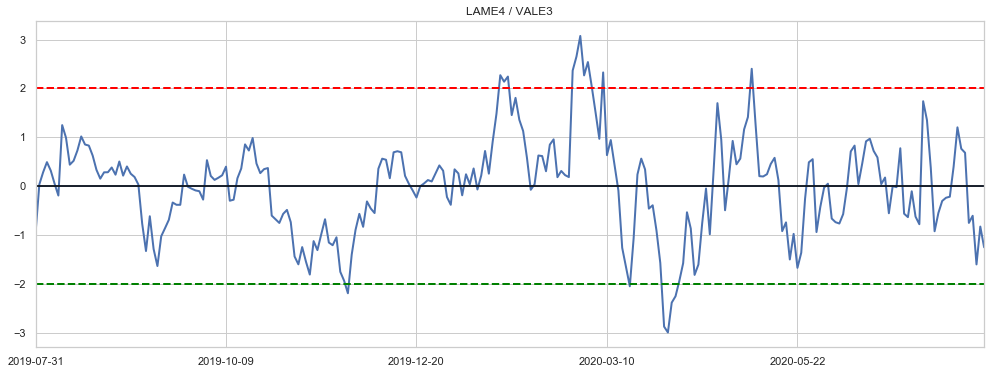

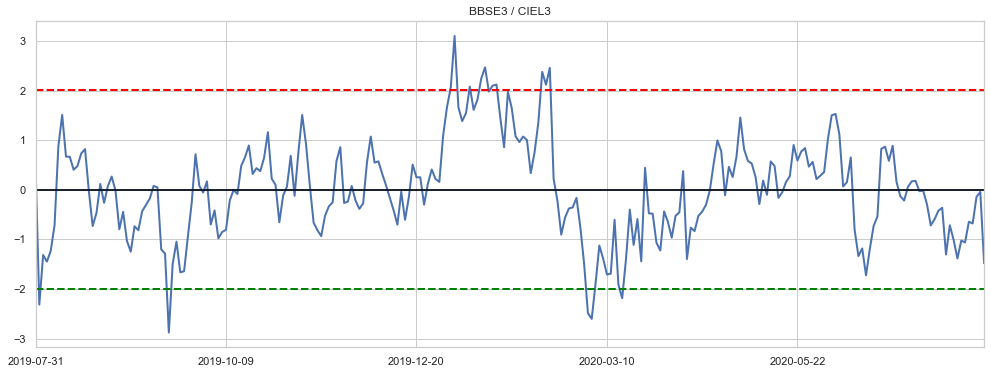

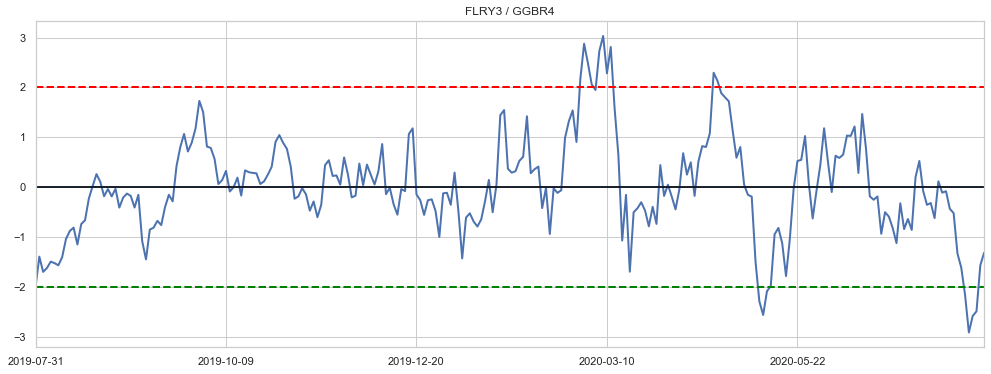

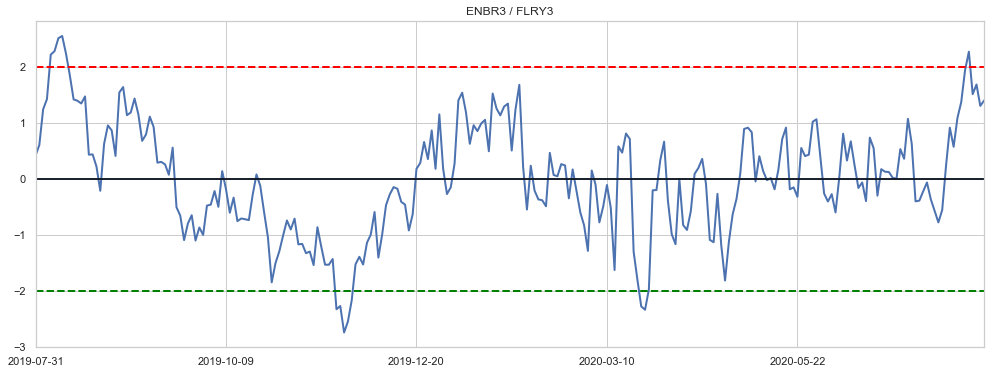

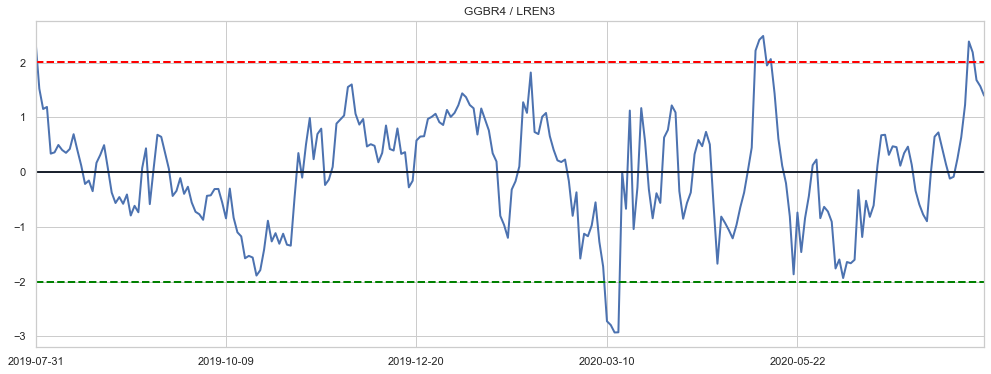

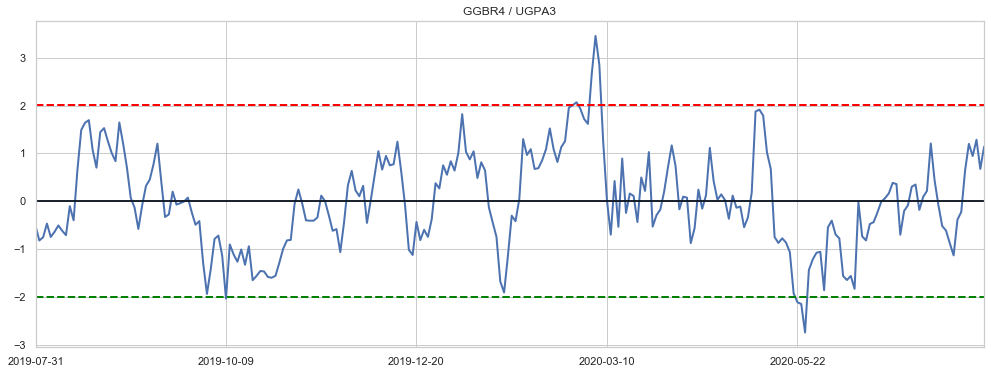

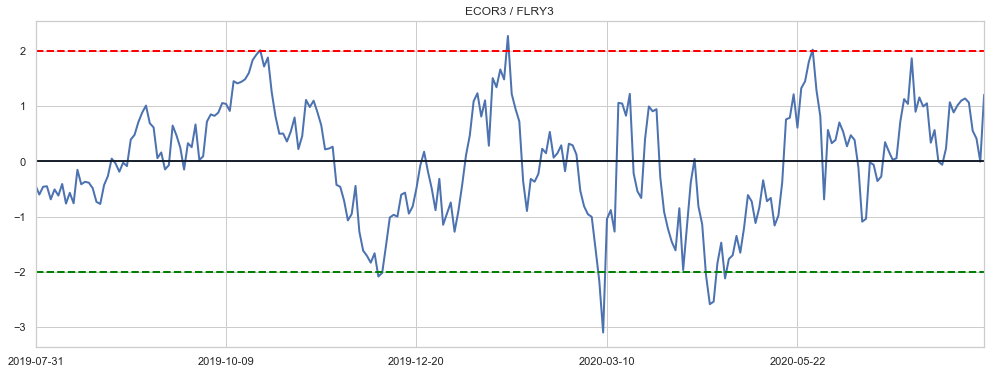

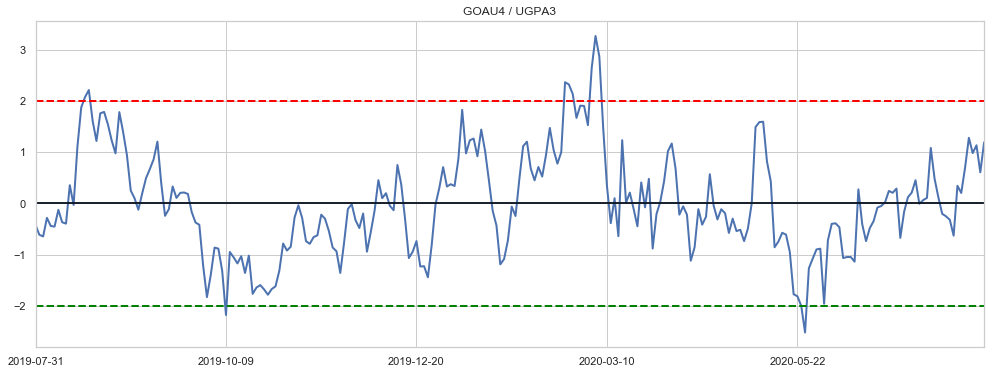

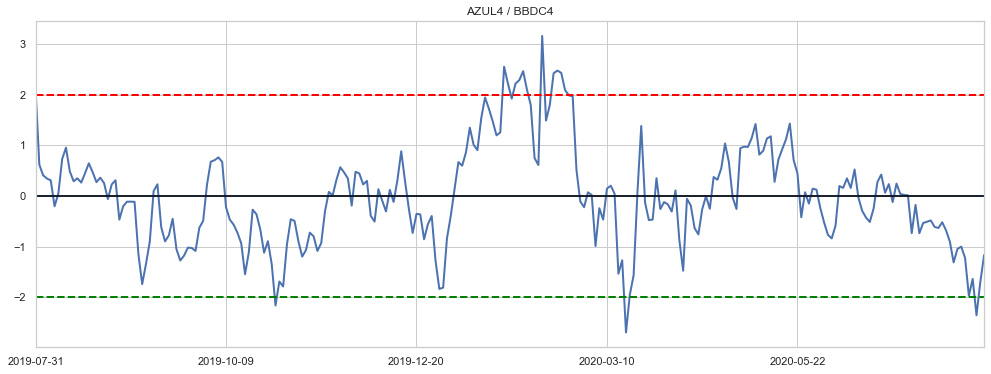

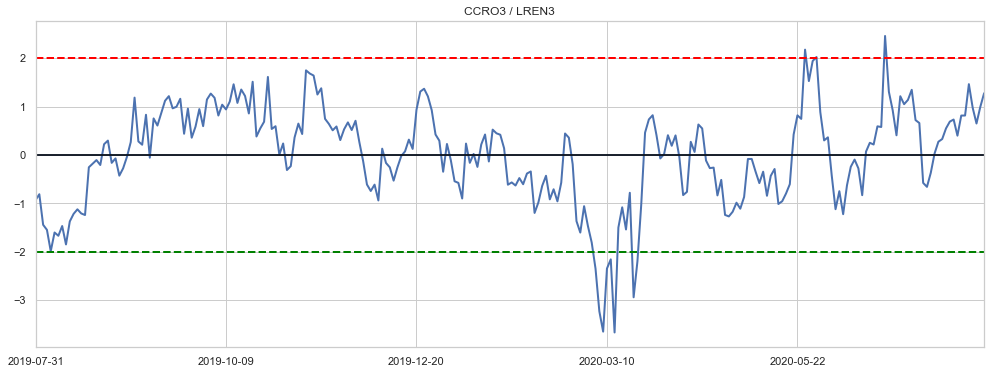

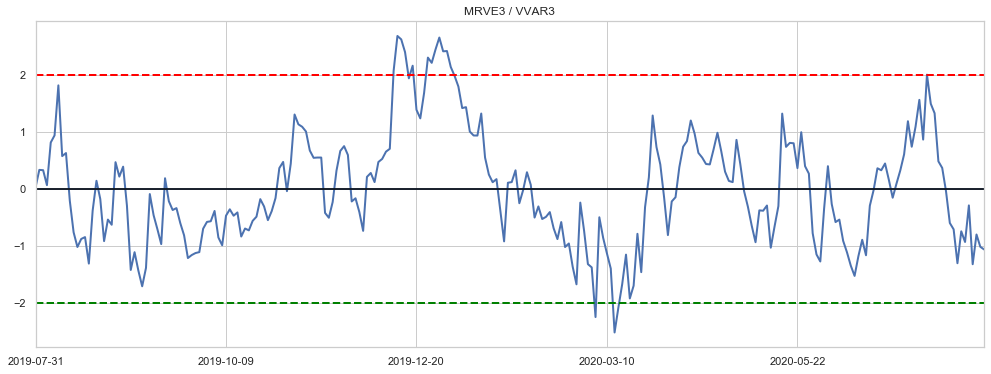

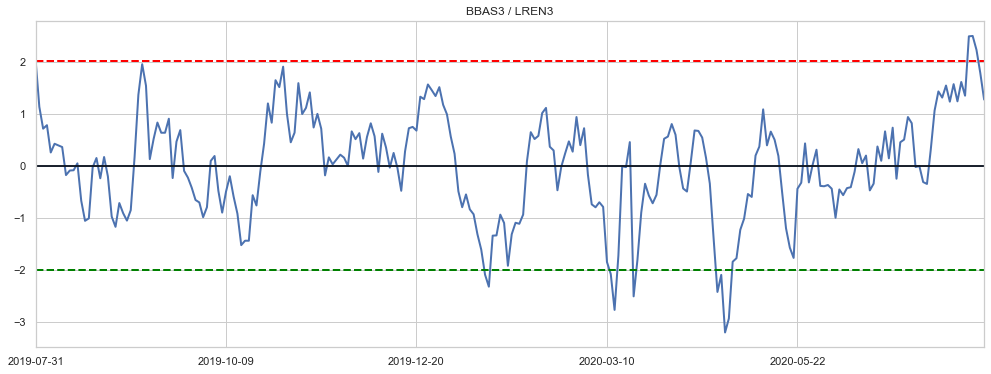

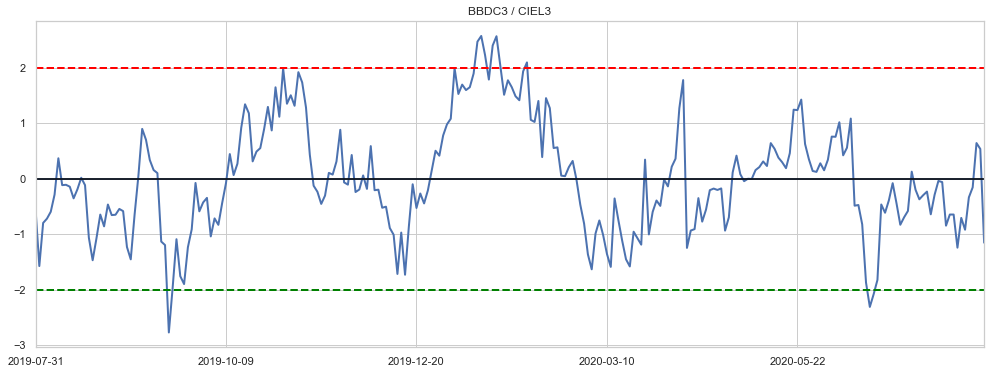

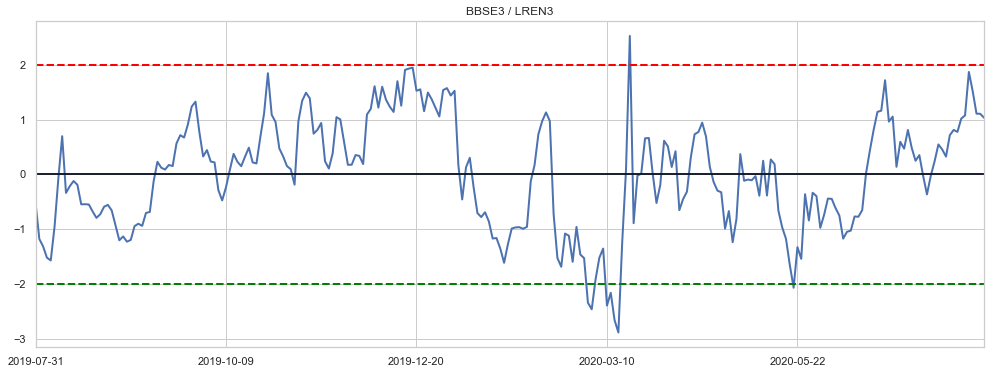

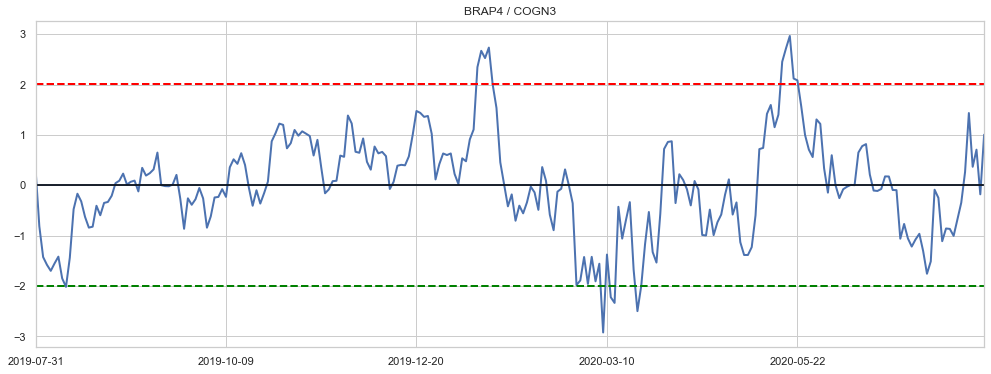

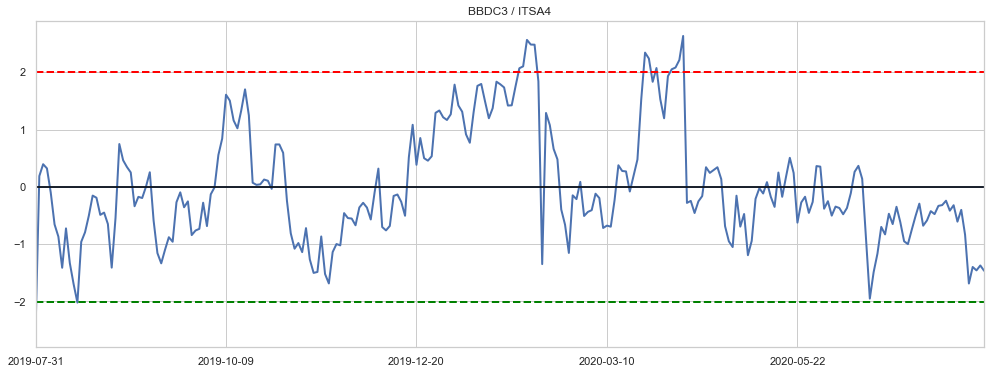

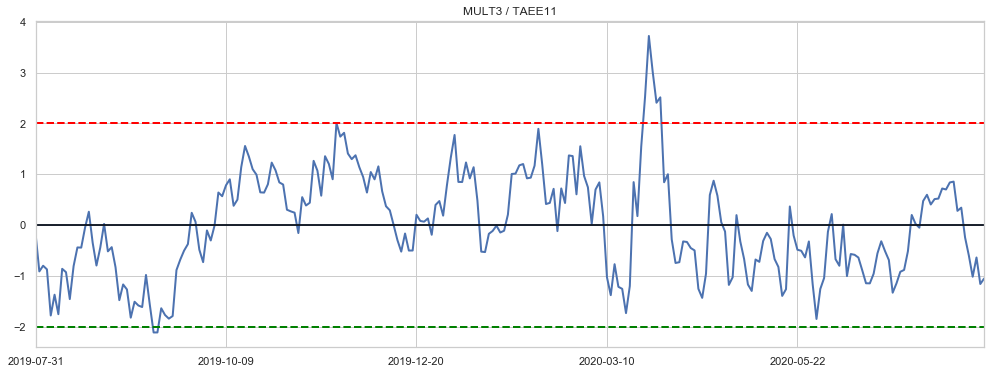

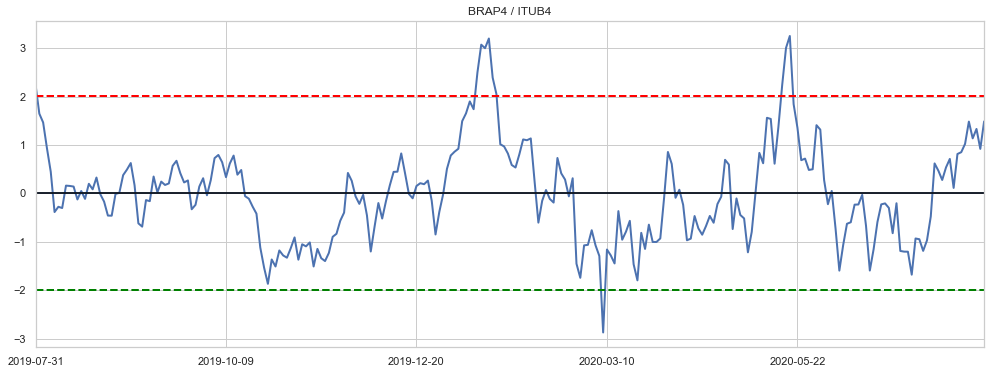

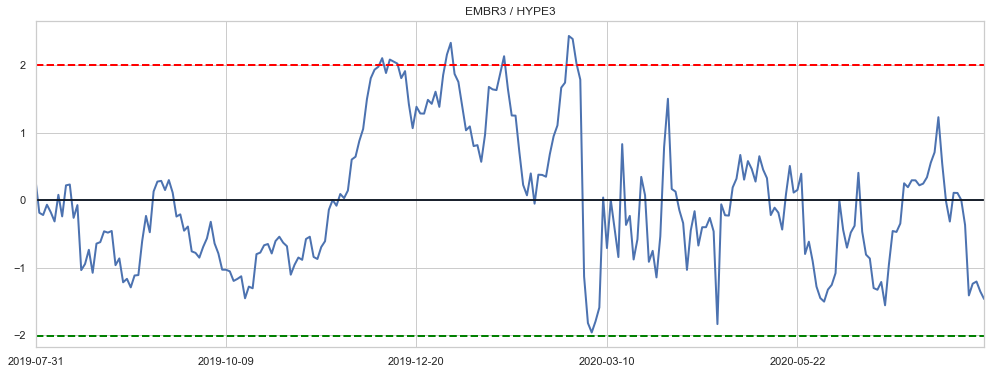

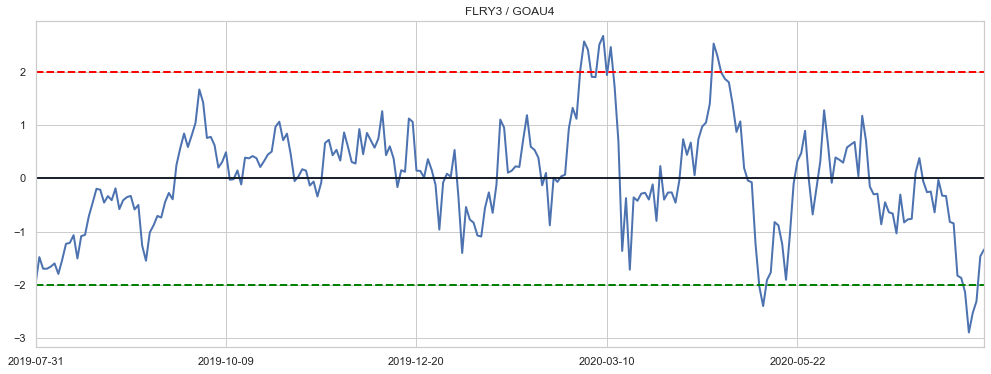

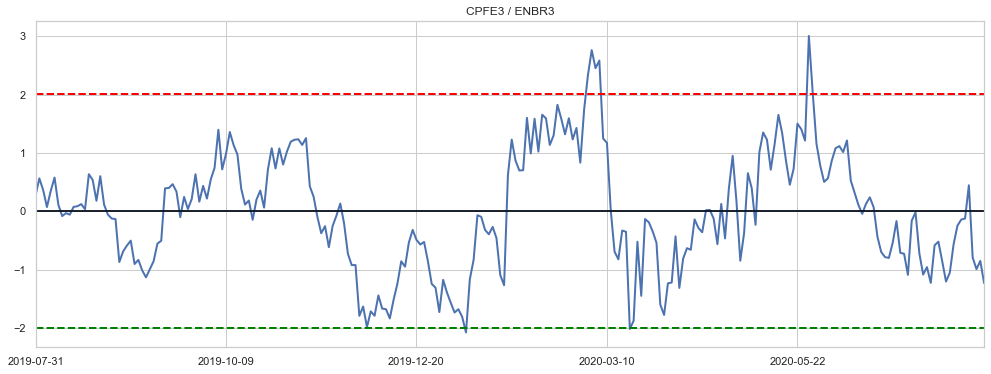

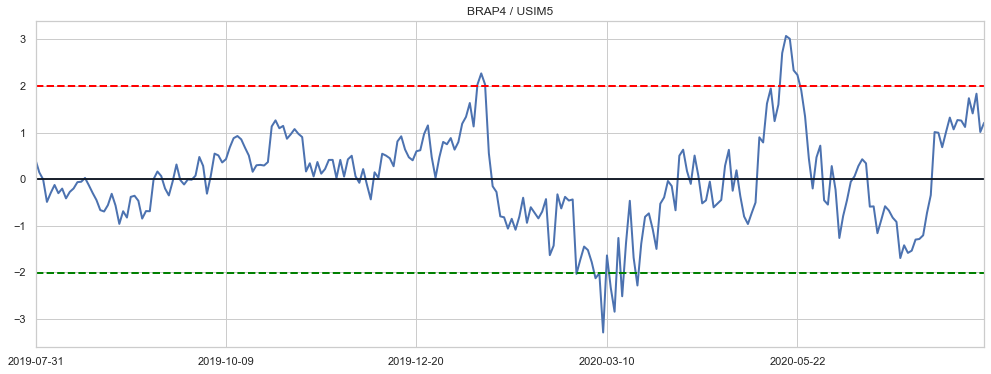

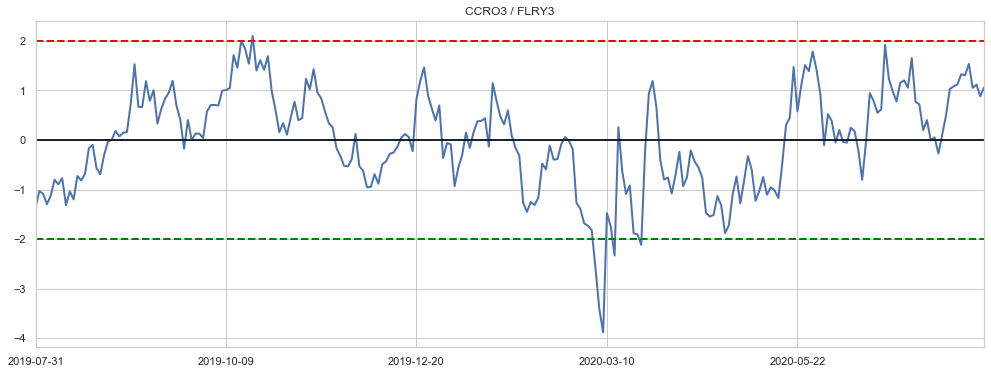

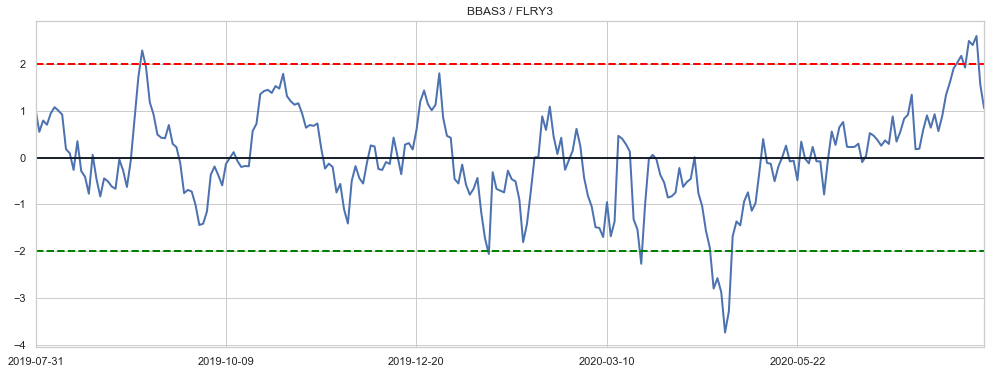

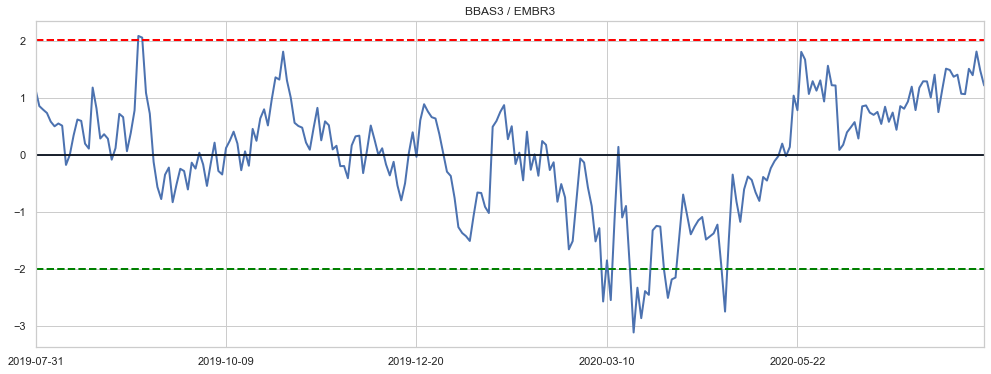

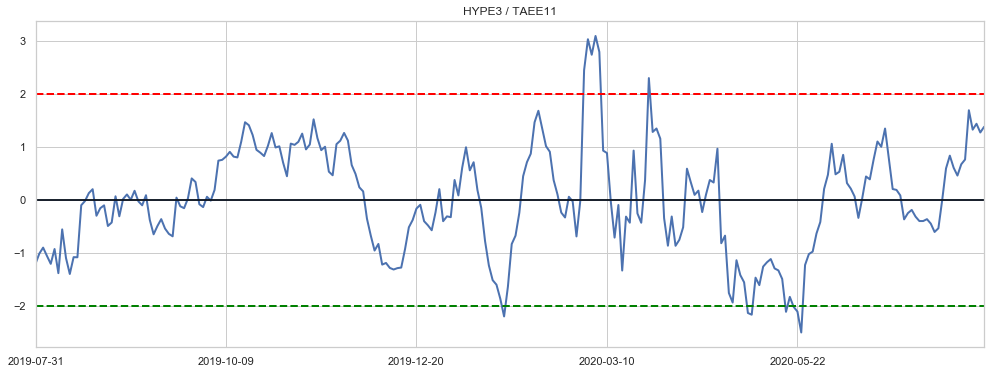

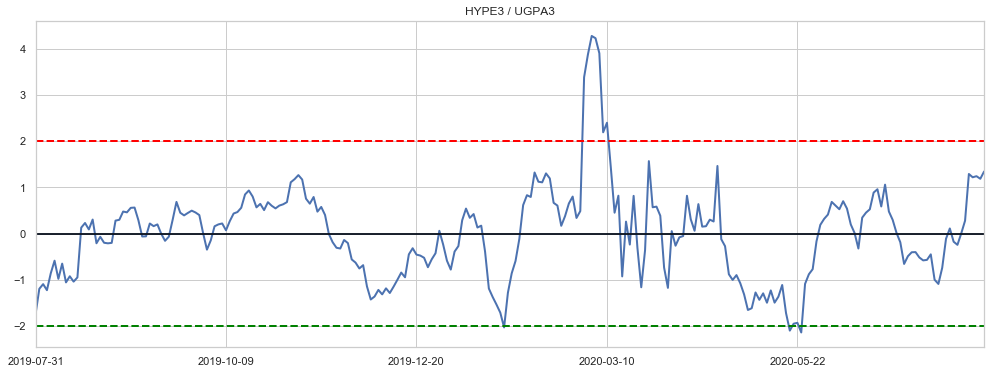

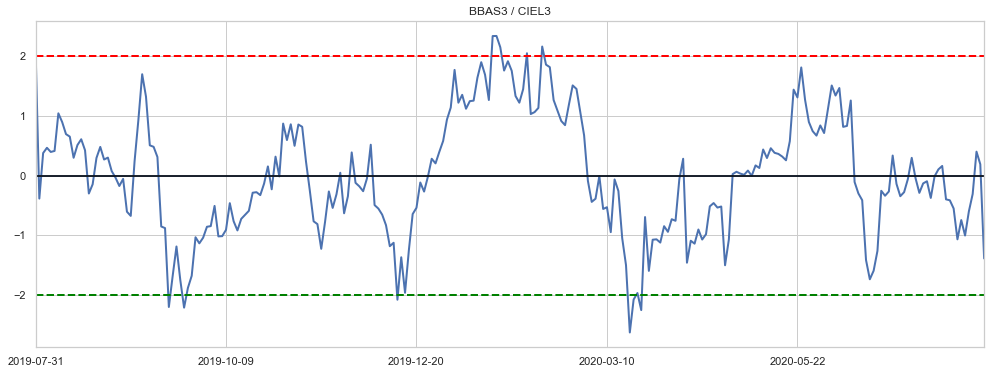

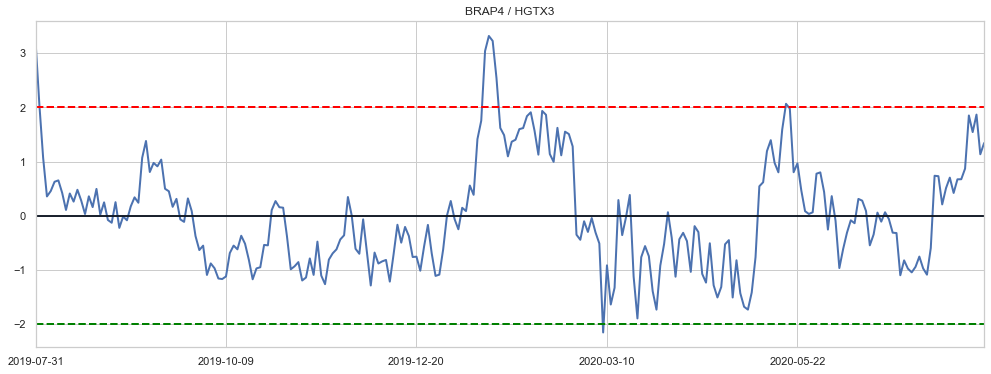

In [55]:
plot_pairs(pairs_signal, data)

In [9]:
#pairs_signal.to_csv('datasets/sinais/sinais_06072020.csv', index=False)

In [10]:
#pairs_signal.iloc[[0,1,3]].to_csv('datasets/oper/13072020.csv', index=False)

# Análise das operações abertas

In [11]:
oper = pd.read_csv('datasets/operations.csv')
oper

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,HalfLife,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,BBAS3,TAEE11,-4.824291,99,3.638531,5,0.602430,1.029805,Short/Long,9,"100,120,140,160,180,200,220,240,250"
1,250,CMIG4,ENGI11,-4.257065,99,0.298534,5,0.768918,1.023665,Short/Long,9,"100,120,140,160,180,200,220,240,250"
2,250,BRKM5,LAME4,-4.066723,99,1.197584,6,0.554915,1.082008,Long/Short,9,"100,120,140,160,180,200,220,240,250"


In [12]:
#mult.analysis_by_periods(data['BRKM5'], data['LAME4'])

In [13]:
"""oper.drop(2, inplace=True)
new = pairs_signal.iloc[[1]].copy()

oper = pd.concat([new, oper])
oper.reset_index(drop=True, inplace=True)
oper.to_csv('datasets/operations.csv', index=False)
oper"""

"oper.drop(2, inplace=True)\nnew = pairs_signal.iloc[[1]].copy()\n\noper = pd.concat([new, oper])\noper.reset_index(drop=True, inplace=True)\noper.to_csv('datasets/operations.csv', index=False)\noper"

In [14]:
#oper.to_csv('datasets/operations.csv', index=False)

In [15]:
#mult.residue(data['CMIG4'], data['ENGI11'], 250)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


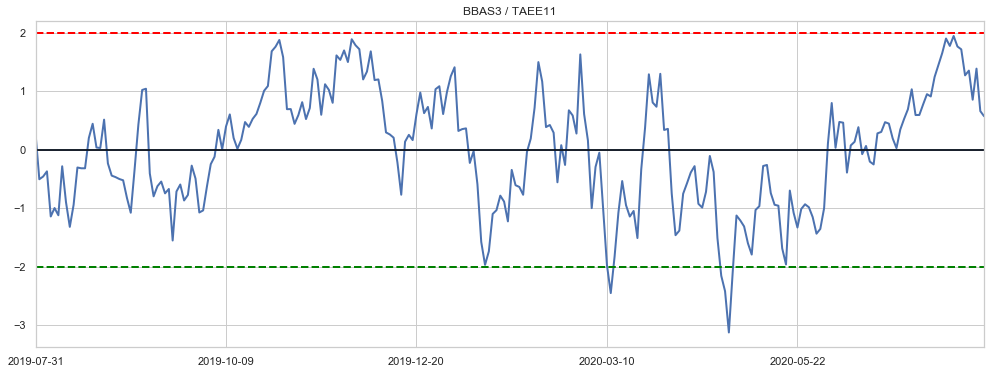

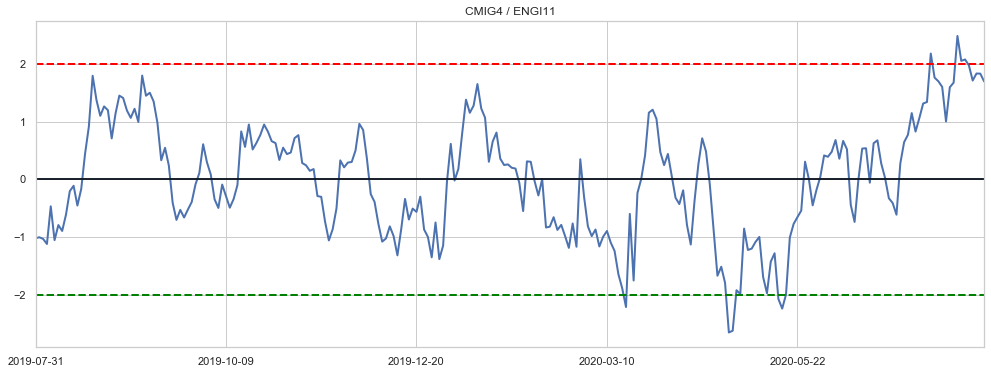

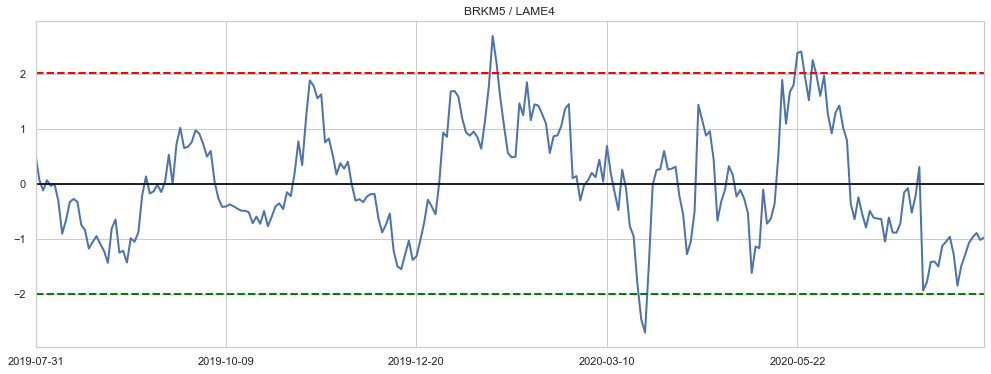

In [16]:
plot_pairs(oper, data)

In [17]:
#df.to_excel('datasets/data_cart.xlsx')

In [18]:
for i, row in oper.iterrows():
    y_symbol = row['Dependent']
    x_symbol = row['Independent']
    period = row['Period']
    mult.summary(data, y_symbol, x_symbol, 250)

Período de Análise                   250   Entrada                              Não
Independente                       BBAS3   Dependente                        TAEE11
R$                                 33.58   R$                                 28.96
Ratio                 1.1595304866241907   
Somente para operação Beta Neutral:
Retorno  (%)          14.893707155722336   Gain                   160.4098060495312
Atual    (%)           4.776944529561778   Loss                    -275.07189245819
Loss     (%)          -8.191538935647236                                           
Dickey Fuller         -3.968745639912886   Meia Vida                              6
ADF                                   99   Correlação  (%)        59.99756982819468
p-value            0.0015833069098902155   Inverter                            True
                                           Beta                  3.7067057428573644
Ratio Entrada         1.2973662952222398   
Ratio Saída           1.104140358474

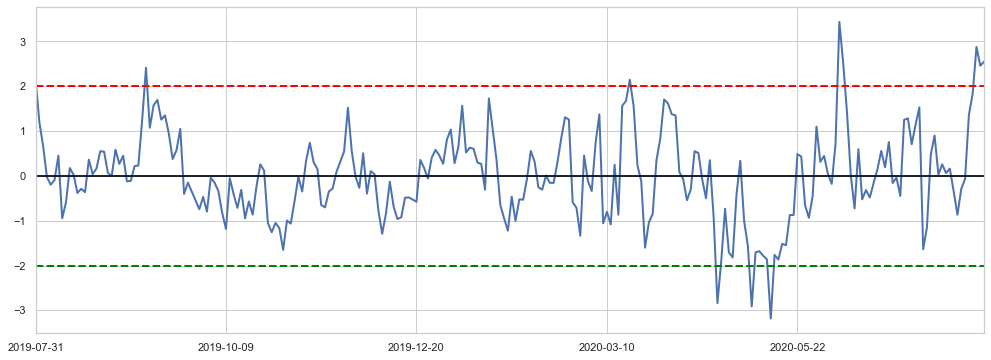

In [19]:
mult.plot_residue(mult.residue(data['CSNA3'], data['LAME4'], 250))

In [20]:
mult.analysis_by_periods(data['LAME4'], data['BRAP4'])

,Period,Stationary,Std,Dickey-Fuller,ADF,Beta,HalfLife,Corr,Model
0,100,True,2.173721,-3.587055,99,0.207599,3,0.559502,MRLM
1,120,True,2.146948,-3.897518,99,0.777769,3,0.597531,MRLM
2,140,True,2.243843,-4.251521,99,0.800475,3,0.590645,MRLM
3,160,True,2.250596,-4.445242,99,0.811121,3,0.585072,MRLM
4,180,True,2.389997,-4.845613,99,0.811889,3,0.569359,MRLM
5,200,True,2.008457,-4.505028,99,0.789686,4,0.563953,MRLM
6,220,True,1.742549,-4.440236,99,0.771490,4,0.559729,MRLM
7,240,True,1.265525,-4.099850,99,0.729979,5,0.553712,MRLM
8,250,True,1.151932,-4.164676,99,0.724605,5,0.547509,MRLM


In [21]:
#coint.show(data[::-1], 'LAME4', 'BRAP4', 250)

In [28]:
test = data[data.index < '2020-07-21'].copy()

In [31]:
coef = mult.coefficients(test['BBAS3'], test['TAEE11'], 250)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


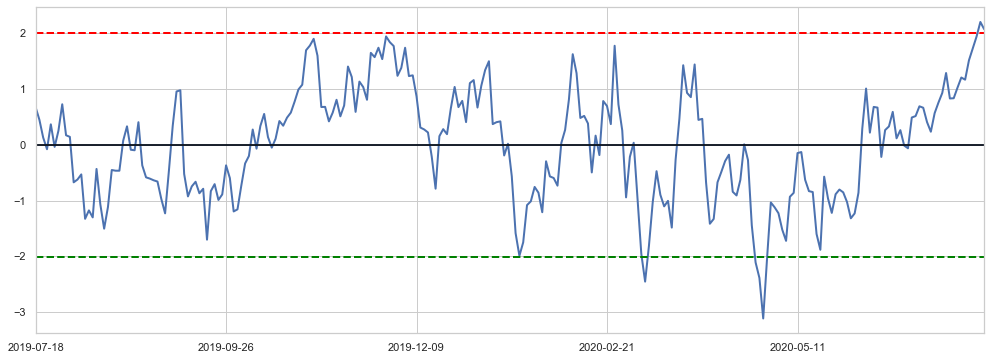

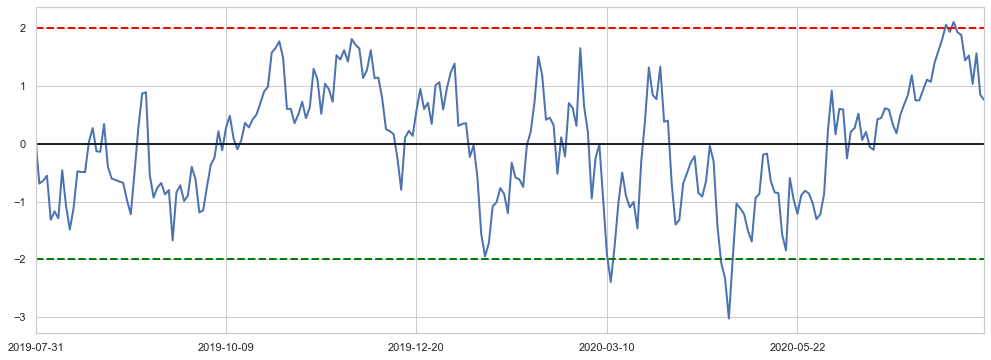

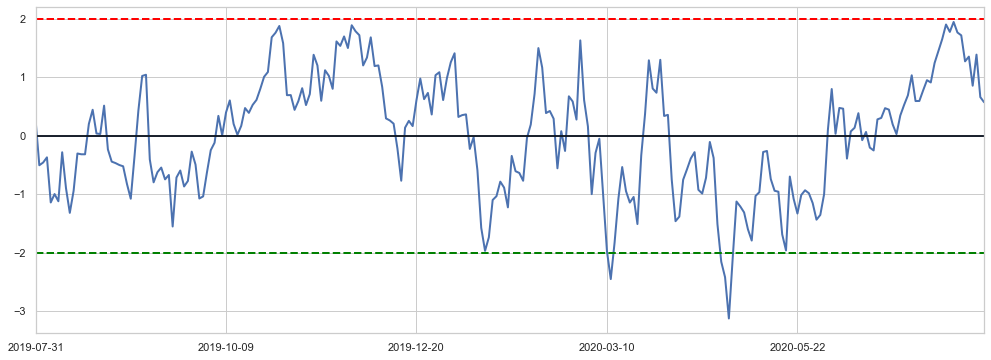

In [37]:
mult.plot_residue(mult.residue(test['BBAS3'], test['TAEE11'], 250))
mult.plot_residue(mult.residue(data['BBAS3'], data['TAEE11'], 250, coef))
mult.plot_residue(mult.residue(data['BBAS3'], data['TAEE11'], 250))